# Influence of Solar Cycle Variability on Zonal Wind Dynamics

#### The objective of this project is to determine if there are correlations between monthly mean sunspot numbers and mean zonal winds in the stratosphere from 1980s to present day. The goal would also be to determine if higher sunspot number correspond to stronger or weaker polar vortex winds in each hemisphere, while assessing lag relationships. 


#### Solar sunspots are active regions on the surface of the Sun, related to enhanced solar activity. The sunspot number is an indicator of solar activity and can influence solar radiation and earth's upper atmospheric conditions.

#### Zonal wind is represented by U Component of wind. It is the east-west component of atmospheric wind. Here, the stratopheric (10 hPa and 30 hPa) will be used to analyze the zonal wind. Positive values indicate flow west to east, while negative values will indicate flow east to west.

#### The two datasets that will be used are:

 * Solar Cycle/Sunspot Number – NOAA SWPC (Space Weather Conditions), Solar Influence Data Analysis Center’s Sunspot number: https://www.swpc.noaa.gov/products/solar-cycle-progression, https://www.sidc.be/SILSO/datafiles

 * Zonal Wind – ERA5 monthly mean zonal wind (downloaded Netcdf file): https://cds.climate.copernicus.eu/datasets/reanalysis-era5-pressure-levels-monthly-means?tab=download


#### First, the sunspot data will be read in. The data will be cleaned and analyzed.

In [22]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
column_names = ['year','month','day','date_fraction','sunspot_number','station_std','observations_used','definitive_indicator'] 

In [12]:
# There are 4 different solar data csv files. This is the daily sunspot number file

column_names = ['year','month','day','date_fraction','sunspot_number','station_std','observations_used','definitive_indicator'] 
daily_sunspot = pd.read_csv('SN_d_tot_V2.0.csv',sep = ';', header = None, names = column_names)

# Monthly mean sunspot number file

column_names_m = ['year','month','date_fraction','monthly_mean_sunspot','m_std','obs_used','definitive_marker']
mm_sunspot = pd.read_csv('SN_m_tot_V2.0.csv', sep = ';', header = None, names = column_names_m)

# Monthly mean sunspot smoothed file

column_names_s = ['year','month','date_fraction','monthly_smoothed_sunspot','m_std','obs_used','definitive_marker']
m_smoothed_sunspot = pd.read_csv('SN_ms_tot_V2.0.csv', sep = ';',header = None, names = column_names_s)

# Yearly mean sunspot number file

columns_y_tot = ['year','yearly_mean_sunspot','yearly_std','obs_used','definitive_marker']
yearly_mean_sunspot = pd.read_csv('SN_y_tot_V2.0.csv', sep = ';', header = None, names = columns_y_tot)
yearly_mean_sunspot

,year,yearly_mean_sunspot,yearly_std,obs_used,definitive_marker
0,1700.5,8.3,-1.0,-1,1
1,1701.5,18.3,-1.0,-1,1
2,1702.5,26.7,-1.0,-1,1
3,1703.5,38.3,-1.0,-1,1
4,1704.5,60.0,-1.0,-1,1
...,...,...,...,...,...
320,2020.5,8.8,4.1,14440,1
321,2021.5,29.6,7.9,15233,1
322,2022.5,83.2,14.2,15258,1
323,2023.5,125.5,19.2,13286,1


In [13]:
# Clean yearly sunspot dataframe for merging and plotting later

yearly_mean_sunspot["year_full"] = yearly_mean_sunspot["year"].astype(int)
yearly_mean_sunspot.drop('year', axis = 1, inplace = True)
yearly_mean_sunspot = yearly_mean_sunspot.rename(columns =  {'year_full': 'year'})
yearly_mean_sunspot

,yearly_mean_sunspot,yearly_std,obs_used,definitive_marker,year
0,8.3,-1.0,-1,1,1700
1,18.3,-1.0,-1,1,1701
2,26.7,-1.0,-1,1,1702
3,38.3,-1.0,-1,1,1703
4,60.0,-1.0,-1,1,1704
...,...,...,...,...,...
320,8.8,4.1,14440,1,2020
321,29.6,7.9,15233,1,2021
322,83.2,14.2,15258,1,2022
323,125.5,19.2,13286,1,2023


In [14]:
# Create date columns in all data frames for merging


# Daily
daily_sunspot['date'] = pd.to_datetime(
    daily_sunspot[['year', 'month', 'day']]
)

# Monthly
mm_sunspot['date'] = pd.to_datetime(
    mm_sunspot[['year', 'month']].assign(day=1)
)
mm_sunspot = mm_sunspot.drop(columns=['year', 'month'], errors='ignore')

# Monthly mean 

m_smoothed_sunspot['date'] = pd.to_datetime(
    m_smoothed_sunspot[['year', 'month']].assign(day=1)
)
m_smoothed_sunspot = m_smoothed_sunspot.drop(columns=['year', 'month'], errors='ignore')

# Yearly
yearly_mean_sunspot['date'] = pd.to_datetime(
    yearly_mean_sunspot[['year']].assign(month=1, day=1)
)
yearly_mean_sunspot = yearly_mean_sunspot.drop(columns=['year'], errors='ignore')


# Merge onto Daily dataframe
merged = (
    daily_sunspot
    .merge(mm_sunspot, on='date', how='left')
    .merge(m_smoothed_sunspot, on='date', how='left')
    .merge(yearly_mean_sunspot, on='date', how='left')
)
# Drop unnecessary columns

merged_new = merged.drop(['date_fraction_x','date_fraction_y'], axis = 1)
merged_new


,year,month,day,sunspot_number,station_std,observations_used,definitive_indicator,date,monthly_mean_sunspot,m_std_x,...,definitive_marker_x,date_fraction,monthly_smoothed_sunspot,m_std_y,obs_used_y,definitive_marker_y,yearly_mean_sunspot,yearly_std,obs_used,definitive_marker
0,1818,1,1,-1,-1.0,0,1,1818-01-01,58.1,9.7,...,1.0,1818.042,57.0,-1.0,8.0,1.0,52.9,9.2,213.0,1.0
1,1818,1,2,-1,-1.0,0,1,1818-01-02,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1818,1,3,-1,-1.0,0,1,1818-01-03,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1818,1,4,-1,-1.0,0,1,1818-01-04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1818,1,5,-1,-1.0,0,1,1818-01-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75905,2025,10,27,98,17.2,31,0,2025-10-27,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75906,2025,10,28,114,13.6,30,0,2025-10-28,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75907,2025,10,29,100,13.3,23,0,2025-10-29,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75908,2025,10,30,70,15.7,25,0,2025-10-30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Select desired time period and check dataframe

merged_1980 = merged_new[merged_new['year'] >= 1980]
merged_1980

print(merged_1980.head())

       year  month  day  sunspot_number  station_std  observations_used  \
59169  1980      1    1             217          9.8                  1   
59170  1980      1    2             224         10.0                  1   
59171  1980      1    3             210          9.7                  1   
59172  1980      1    4             227         10.1                  1   
59173  1980      1    5             261         10.8                  1   

       definitive_indicator       date  monthly_mean_sunspot  m_std_x  ...  \
59169                     1 1980-01-01                 226.1     10.1  ...   
59170                     1 1980-01-02                   NaN      NaN  ...   
59171                     1 1980-01-03                   NaN      NaN  ...   
59172                     1 1980-01-04                   NaN      NaN  ...   
59173                     1 1980-01-05                   NaN      NaN  ...   

       definitive_marker_x  date_fraction  monthly_smoothed_sunspot  m_std_y  \


In [16]:
# Clean merged dataframe so valeus form all 4 files can be plotted

plot_df = merged_1980.copy()
plot_df[['monthly_mean_sunspot',
         'monthly_smoothed_sunspot',
         'yearly_mean_sunspot']] = plot_df[
    ['monthly_mean_sunspot',
     'monthly_smoothed_sunspot',
     'yearly_mean_sunspot']
].ffill()


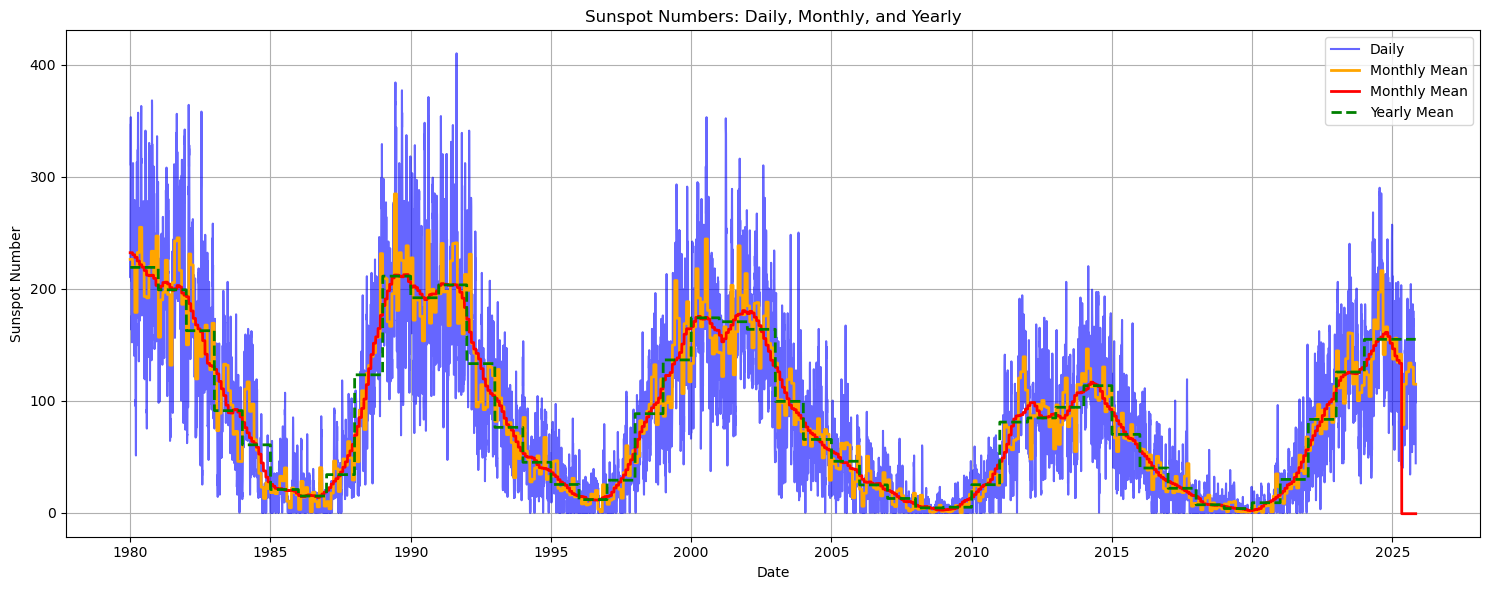

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))

# Daily sunspot numbers
plt.plot(plot_df['date'], plot_df['sunspot_number'], label='Daily', color='blue', alpha=0.6)

# Monthly mean sunspot numbers
plt.plot(plot_df['date'], plot_df['monthly_mean_sunspot'], label='Monthly Mean', color='orange', linewidth=2)

# Monthly smoothed sunspot numbers
plt.plot(plot_df['date'], plot_df['monthly_smoothed_sunspot'], label='Monthly Mean', color='red', linewidth=2)


# Yearly mean sunspot numbers
plt.plot(plot_df['date'], plot_df['yearly_mean_sunspot'], label='Yearly Mean', color='green', linewidth=2, linestyle='--')

# Labels and title
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.title('Sunspot Numbers: Daily, Monthly, and Yearly')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


#### This next section will be reading in and analyzing the ERA5 U Component of Wind data. The zonal winds will be calculated for each hemisphere.

In [ ]:
import xarray as xr
import numpy as np
ds = xr.open_dataset('monthly_u_component_wind.nc')
print(ds)


<xarray.Dataset> Size: 5GB
Dimensions:         (valid_time: 551, pressure_level: 2, latitude: 721,
                     longitude: 1440)
Coordinates:
  * valid_time      (valid_time) datetime64[ns] 4kB 1980-01-01 ... 2025-11-01
  * pressure_level  (pressure_level) float64 16B 30.0 10.0
  * latitude        (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude       (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
    number          int64 8B ...
    expver          (valid_time) <U4 9kB ...
Data variables:
    u               (valid_time, pressure_level, latitude, longitude) float32 5GB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-12-13T01:04 GRIB to CDM+CF via cfgrib-0.9.1...


In [20]:
# Latitude weights

weights = np.cos(np.deg2rad(ds.latitude))

# Zonal mean (longitude average)

u_zonal = ds['u'].weighted(weights).mean(dim='longitude')

# Hemisphere separation

u_nh = u_zonal.sel(latitude=slice(90, 0))
u_sh = u_zonal.sel(latitude=slice(0, -90))

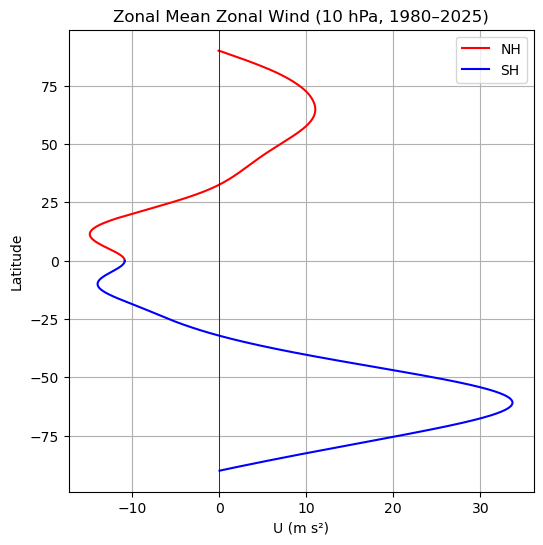

In [ ]:
# Plot zonal mean winds (1980 - 2025) at 10 hPa 

u_nh_clim = u_nh.mean('valid_time')
u_sh_clim = u_sh.mean('valid_time')

plt.figure(figsize=(6,6))

plt.plot(u_nh_clim.sel(pressure_level = 10), u_nh_clim.latitude,
         label = 'NH', color = 'red')
plt.plot(u_sh_clim.sel(pressure_level = 10), u_sh_clim.latitude,
         label = 'SH', color = 'blue')

plt.axvline(0, color = 'k', lw = 0.5)
plt.xlabel('U (m s\u00b2)')
plt.ylabel('Latitude')
plt.title('Zonal Mean Wind (10 hPa, 1980–2025)')
plt.legend()
plt.grid()
plt.show()



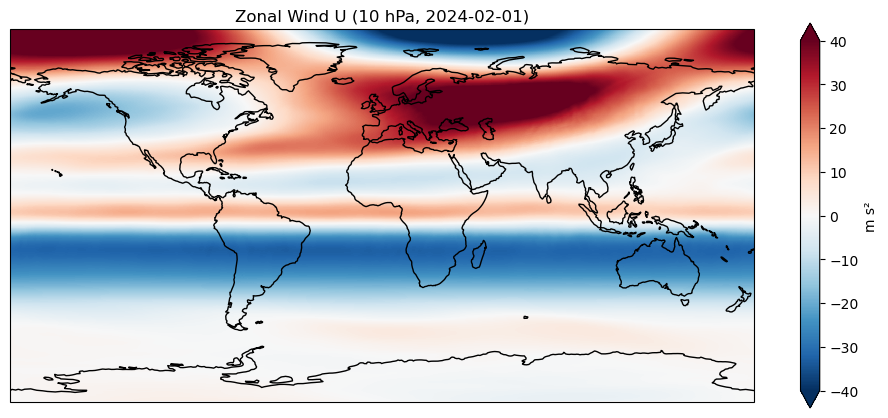

In [36]:
# Plot map of wind speed for selected dau

import cartopy.crs as ccrs

u_map = ds['u'].sel(
    valid_time = '2024-02-01',
    pressure_level = 10
)

fig = plt.figure(figsize =( 12,5))
ax = plt.axes(projection = ccrs.PlateCarree())

u_map.plot(
    ax = ax,
    transform = ccrs.PlateCarree(),
    cmap = 'RdBu_r',
    vmin = -40, vmax = 40,
    cbar_kwargs = {'label' : 'm s\u00b2'}
)

ax.coastlines()
ax.set_title('Zonal Wind U (10 hPa, 2024-02-01)')
plt.show()


#### In this next section we will merge the solar and wind data to analyze the correlation between sunspot number and zonal wind.

In [ ]:
# Create polar vortex data arrays

weights = np.cos(np.deg2rad(ds.latitude))

# Norhtern Hemisphere polar vortex wind
u_nh_pv = (
    ds['u']
    .sel(latitude=slice(90, 60), pressure_level=30)
    .weighted(weights)
    .mean(dim=['latitude', 'longitude'])
)

# Souther Hemisphere polar vortex wind
u_sh_pv = (
    ds['u']
    .sel(latitude=slice(-60, -90), pressure_level=30)
    .weighted(weights)
    .mean(dim=['latitude', 'longitude'])
)

u_nh_pv = u_nh_pv.rename('u_nh')
u_sh_pv = u_sh_pv.rename('u_sh')


In [32]:
# Merge data arrays and convert to dataframe

plot_df['date'] = pd.to_datetime(plot_df['date'])
wind_df = (
    xr.merge([u_nh_pv, u_sh_pv])
    .to_dataframe()
    .reset_index()
    .rename(columns = {'valid_time': 'date'})
)


/tmp/ipykernel_3752/1959145503.py:5: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  xr.merge([u_nh_pv, u_sh_pv])
/tmp/ipykernel_3752/1959145503.py:5: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  xr.merge([u_nh_pv, u_sh_pv])
/tmp/ipykernel_3752/1959145503.py:5: FutureWarning: In a future version of xarray the default value for compat w

In [ ]:
# Merge solar and wind data frames

solar_wind_combined = plot_df.merge(wind_df, on = 'date', how = 'inner')


In [ ]:
# Calculate correlation between monthly mean sunspots and polar vortex winds in each hemisphere.

solar_wind_combined[['monthly_mean_sunspot', 'u_nh', 'u_sh']].corr()


,monthly_mean_sunspot,u_nh,u_sh
monthly_mean_sunspot,1.000000,0.026326,-0.006790
u_nh,0.026326,1.000000,-0.656721
u_sh,-0.006790,-0.656721,1.000000


In [ ]:
# Analyze correlation when lag is incorporated

import numpy as np

max_lag = 36
lags = np.arange(0, max_lag + 1)

corr_nh = []
corr_sh = []

for lag in lags:
    corr_nh.append(
        solar_wind_combined['monthly_mean_sunspot']
        .corr(solar_wind_combined["u_nh"].shift(-lag))
    )
    corr_sh.append(
        solar_wind_combined['monthly_mean_sunspot']
        .corr(solar_wind_combined['u_sh'].shift(-lag))
    )



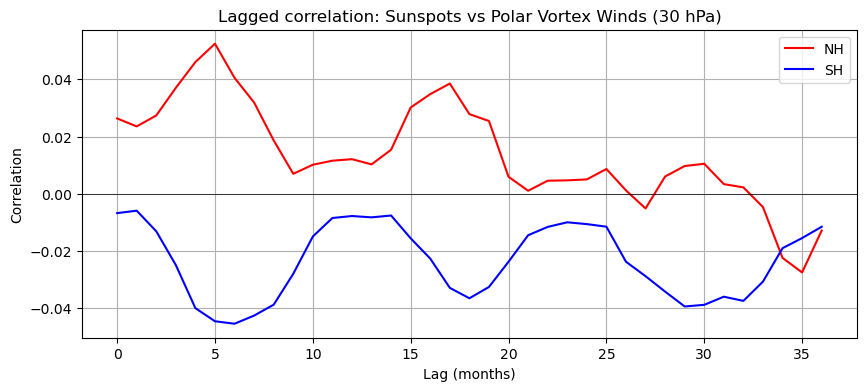

In [37]:
# Plot change in correlation as lag months change

import matplotlib.pyplot as plt

plt.figure(figsize = (10,4))
plt.plot(lags, corr_nh, label = 'NH', color = 'red')
plt.plot(lags, corr_sh, label = 'SH', color = 'blue')
plt.axhline(0, color = 'k', lw = 0.5)
plt.xlabel('Lag (months)')
plt.ylabel('Correlation')
plt.title('Lagged correlation: Sunspots vs Polar Vortex Winds (30 hPa)')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Calulate mean windspeed for high vs low solar sunspot occurrences

high_solar = solar_wind_combined[solar_wind_combined["monthly_mean_sunspot"] > 200]
low_solar  = solar_wind_combined[solar_wind_combined["monthly_mean_sunspot"] < 20]

print(high_solar[["u_nh", "u_sh"]].mean())
print(low_solar[["u_nh", "u_sh"]].mean())



u_nh     9.682166
u_sh    20.534571
dtype: float64
u_nh     7.759582
u_sh    21.624636
dtype: float64


In [ ]:
# Select date with high and low solar sunspot number

solar_max_dates = plot_df[plot_df['monthly_mean_sunspot'] > 100]['date']
solar_min_dates = plot_df[plot_df['monthly_mean_sunspot'] < 20]['date']

max_date = solar_max_dates.iloc[0]
min_date = solar_min_dates.iloc[0]


u_max = ds['u'].sel(valid_time =max_date, pressure_level = 30)
u_min = ds['u'].sel(valid_time = min_date, pressure_level = 30)



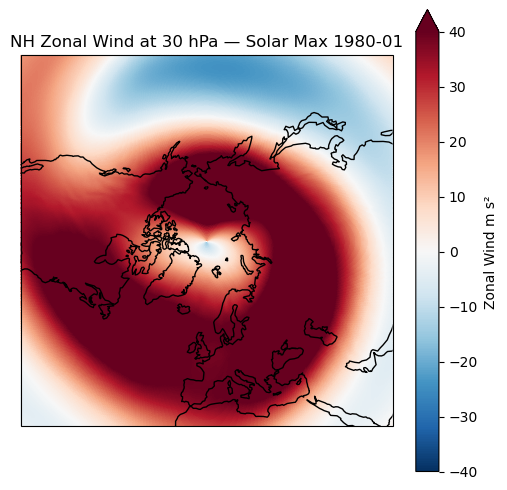

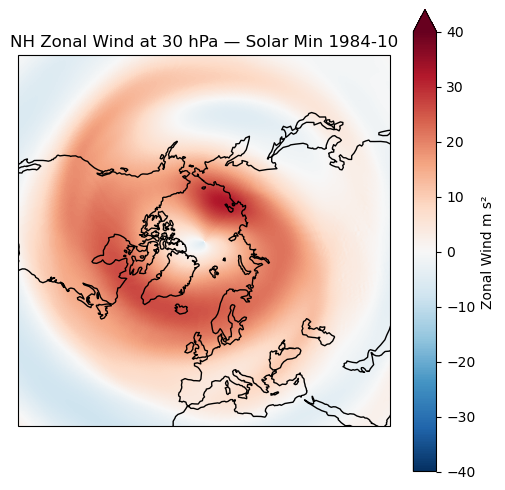

In [44]:
# Plot the wind speeds for these respective dates. First at the Northern Hemisphere

def plot_polar_u(u_data, title):
    proj = ccrs.NorthPolarStereo()
    fig, ax = plt.subplots(figsize = (6,6), subplot_kw = {'projection': proj})

    u_data.plot.pcolormesh(
        ax = ax,
        transform = ccrs.PlateCarree(),
        cmap = 'RdBu_r',
        vmin = -40,
        vmax = 40,
        cbar_kwargs = {'label' : 'Zonal Wind m s\u00b2'}
    )

    ax.coastlines()
    ax.set_extent([-180, 180, 30, 90], crs = ccrs.PlateCarree())
    ax.set_title(title)
    plt.show()

# Plot solar max
plot_polar_u(u_max, f"NH Zonal Wind at 30 hPa — Solar Max {max_date.strftime('%Y-%m')}")

# Plot solar min
plot_polar_u(u_min, f"NH Zonal Wind at 30 hPa — Solar Min {min_date.strftime('%Y-%m')}")


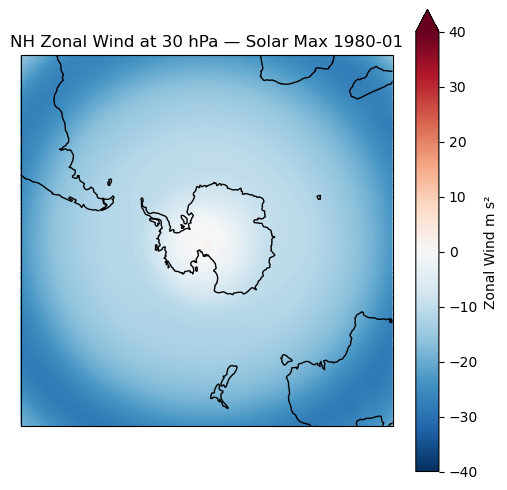

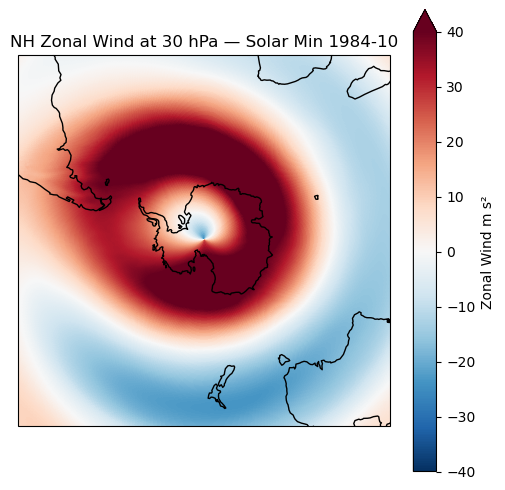

In [45]:
# Plot the wind speeds for these respective dates. First at the Northern Hemisphere

def plot_polar_u(u_data, title):
    proj = ccrs.SouthPolarStereo()
    fig, ax = plt.subplots(figsize = (6,6), subplot_kw = {'projection' : proj})

    u_data.plot.pcolormesh(
        ax = ax,
        transform = ccrs.PlateCarree(),
        cmap = 'RdBu_r',
        vmin = -40,
        vmax = 40,
        cbar_kwargs = {'label': 'Zonal Wind m s\u00b2'}
    )

    ax.coastlines()
    ax.set_extent([-180, 180, -90, -30], crs = ccrs.PlateCarree())
    ax.set_title(title)
    plt.show()

# Plot solar max
plot_polar_u(u_max, f"NH Zonal Wind at 30 hPa — Solar Max {max_date.strftime('%Y-%m')}")

# Plot solar min
plot_polar_u(u_min, f"NH Zonal Wind at 30 hPa — Solar Min {min_date.strftime('%Y-%m')}")


#### We can see from the correlation values above, along with the charts and visualizations that there is a mild, but not insignificant correlation between monthly solar sunspot number and zonal mean wind. This is strongest in the Northern Hemisphere and with a 6 month lag. 